https://dataplatform.cloud.ibm.com/data/notebooks/converter/assets/79a436d6-51b7-4cb3-962d-5d2bbcb37e78?access_token=025031e1b7902891194b22266aee25230c88c44cfbb55cf3db2e0a7b712c7017&project=87db0240-1cfa-47f3-8b98-396d95cf2671

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Primeiro Exemplo

In [15]:
data = [[9, 1, 10],
        [10, 3, 14],
        [13, 4, 15],
        [14, 6, 18],
        [16, 7, 20]]

# Create the pandas DataFrame
ex1_df = pd.DataFrame(data, columns=['Y', 'X1', 'X2'])
ex1_df.head()

,Y,X1,X2
0,9,1,10
1,10,3,14
2,13,4,15
3,14,6,18
4,16,7,20


## Sklearn

In [19]:
regressor = LinearRegression()
regressor.fit(ex1_df[['X1', 'X2']], ex1_df['Y'])
print(regressor.coef_)
print(regressor.intercept_)

[ 2.96078431 -1.11764706]
17.17647058823531


## Statsmodel OLS (Ordinary Least Squared)

In [18]:
sm_X1_var = sm.add_constant(ex1_df[['X1', 'X2']])
mlr_model = sm.OLS(ex1_df['Y'], sm_X1_var)
mlr_reg = mlr_model.fit()
mlr_reg.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     19.65
Date:                Sat, 18 Nov 2023   Prob (F-statistic):             0.0484
Time:                        22:50:33   Log-Likelihood:                -4.2583
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       2   BIC:                             13.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.1765     11.640      1.476      0.278     -32.905      67.258
X1             2.9608      2.160      1.371      0.304      -6.333      12.255
X2            -1.1176      1.341     -0.834      0.492      -6.885       4.650
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.500
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.411
Skew:                          -0.135   Prob(JB):                        0.814
Kurtosis:                       1.621   Cond. No.                         489.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Segundo Exemplo

In [2]:
!wget 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'

--2023-11-18 22:41:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2673776 (2.5M) [text/csv]
Saving to: ‘kc_house_data_NaN.csv’

kc_house_data_NaN.c 100%[===================>]   2.55M  11.1MB/s    in 0.2s    

2023-11-18 22:41:26 (11.1 MB/s) - ‘kc_house_data_NaN.csv’ saved [2673776/2673776]



In [4]:
df = pd.read_csv('/content/kc_house_data_NaN.csv')
df.head(3)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [5]:
df = df.drop(['id', 'date', 'Unnamed: 0'], axis=1)
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21600 non-null  float64
 2   bathrooms      21603 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
df['bedrooms'].replace(np.nan,df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan,df['bathrooms'].mean(), inplace=True)

In [9]:
# sqft_living: Metragem quadrados da casa
# sqlt_lot: Metragem quadrada do lote
# waterfront: House which has a view to a waterfront
# sqft_above: square footage of house apart from basement
# sqft_basement: square footage of the basement
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


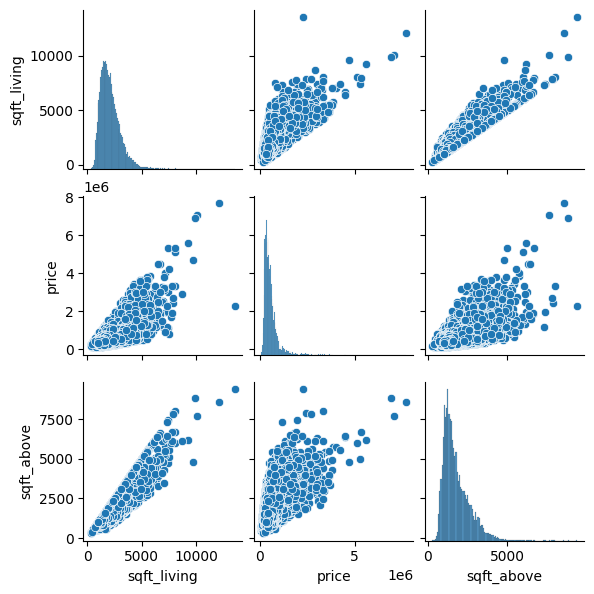

In [83]:
sns.pairplot(df[['sqft_living', 'price', 'sqft_above']], size=2)

## SkLearn

In [10]:
# multiple linear regression

y_data = df['price'] #  independent variable
x_data = df.drop('price',axis=1) #  dependent variables

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

In [79]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)

[-3.49213729e+04  4.23008459e+04  1.11913696e+02  9.46509357e-02
  6.45531219e+03  5.45554197e+05  5.55175560e+04  2.69768466e+04
  9.45836124e+04  7.38907702e+01  3.80229253e+01 -2.58550783e+03
  1.93043317e+01 -5.63549667e+02  6.08735520e+05 -2.12487119e+05
  1.43568699e+01 -3.48256811e-01]
4769425.238251238


In [ ]:
# Predicting the Test set results
yhat = regressor.predict(x_test)
yhat

In [81]:
print(regressor.score(x_test, y_test))

0.6904888348698548


## Statsmodel OLS (Ordinary Least Squared)

In [53]:
sm_X1_var = sm.add_constant(x_data)

mlr_model = sm.OLS(y_data, sm_X1_var)
mlr_reg = mlr_model.fit()

In [54]:
mlr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2961.
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:08:26   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           6.64e+06   2.93e+06      2.265      0.024    8.94e+05    1.24e+07
bedrooms      -3.562e+04   1899.503    -18.753      0.000   -3.93e+04   -3.19e+04
bathrooms      4.179e+04   3262.322     12.809      0.000    3.54e+04    4.82e+04
sqft_living     110.1106      2.276     48.375      0.000     105.649     114.572
sqft_lot          0.1286      0.048      2.683      0.007       0.035       0.223
floors         6603.6940   3598.504      1.835      0.067    -449.639    1.37e+04
waterfront      5.83e+05   1.74e+04     33.584      0.000    5.49e+05    6.17e+05
view           5.288e+04   2139.961     24.712      0.000    4.87e+04    5.71e+04
condition      2.632e+04   2351.109     11.194      0.000    2.17e+04    3.09e+04
grade          9.582e+04   2153.353     44.500      0.000    9.16e+04       1e+05
sqft_above       70.6850      2.254     31.361      0.000      66.267      75.103
sqft_basement    39.4262      2.649     14.882      0.000      34.233      44.619
yr_built      -2623.6776     72.652    -36.113      0.000   -2766.080   -2481.275
yr_renovated     19.7196      3.655      5.395      0.000      12.555      26.884
zipcode        -582.1499     32.987    -17.648      0.000    -646.807    -517.493
lat            6.027e+05   1.07e+04     56.144      0.000    5.82e+05    6.24e+05
long           -2.15e+05   1.31e+04    -16.371      0.000   -2.41e+05   -1.89e+05
sqft_living15    21.8102      3.448      6.326      0.000      15.053      28.568
sqft_lot15       -0.3802      0.073     -5.190      0.000      -0.524      -0.237
==============================================================================
Omnibus:                    18390.087   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1870415.663
Skew:                           3.568   Prob(JB):                         0.00
Kurtosis:                      48.012   Cond. No.                     5.79e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.52e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<ipython-input-55-1f33b08eedda>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
<ipython-input-55-1f33b08eedda>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Valu

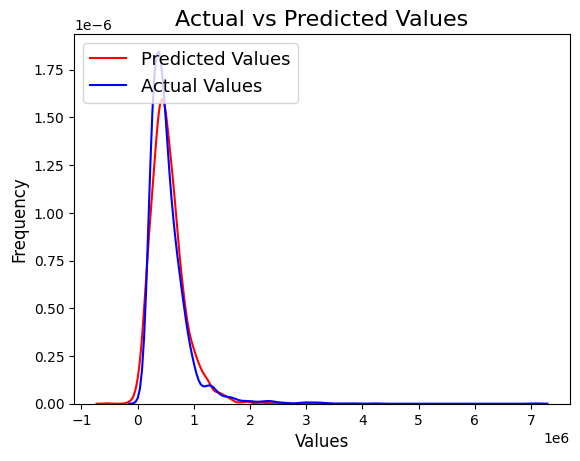

In [55]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)